In [2]:
!unzip "/content/drive/MyDrive/Ratina Dataset.zip"

Archive:  /content/drive/MyDrive/Ratina Dataset.zip
   creating: Ratina Dataset/Data/
   creating: Ratina Dataset/Data/Glocoma/
  inflating: Ratina Dataset/Data/Glocoma/image100prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image101prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image102prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image103prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image104prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image105prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image106prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image107prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image108prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image109prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image10prime.jpg  
  inflating: Ratina Dataset/Data/Glocoma/image10prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image110prime.tif  
  inflating: Ratina Dataset/Data/Glocoma/image111prime.tif  
  inflating: Ratina 

In [3]:
!pip install split-folders

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense,Dropout
from tensorflow.keras.optimizers.legacy import SGD,Adam
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [5]:
os.listdir('/content/Ratina Dataset/Data')

['Non Glocoma', 'Glocoma']

In [6]:
path_main = '/content/Ratina Dataset/Data'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder))
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'Item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Non Glocoma

Number of elements: 511

Item's name: c9d42d7534e0.png

***************************
Folder: Glocoma

Number of elements: 511

Item's name: image423prime.tif

***************************


In [7]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [8]:
path_glocoma = '/content/Ratina Dataset/Data/Glocoma'
path_nonglocoma = '/content/Ratina Dataset/Data/Non Glocoma'


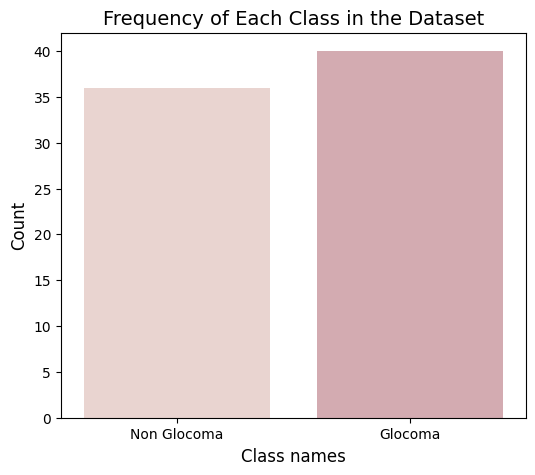

In [9]:
import plotly.express as px
class_names = ['Non Glocoma', 'Glocoma']

glocoma = len(path_glocoma)
nonglocoma = len(path_nonglocoma)


images = [glocoma, nonglocoma]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()
px.pie(names= class_names, values= images, color_discrete_sequence=px.colors.sequential.BuGn)

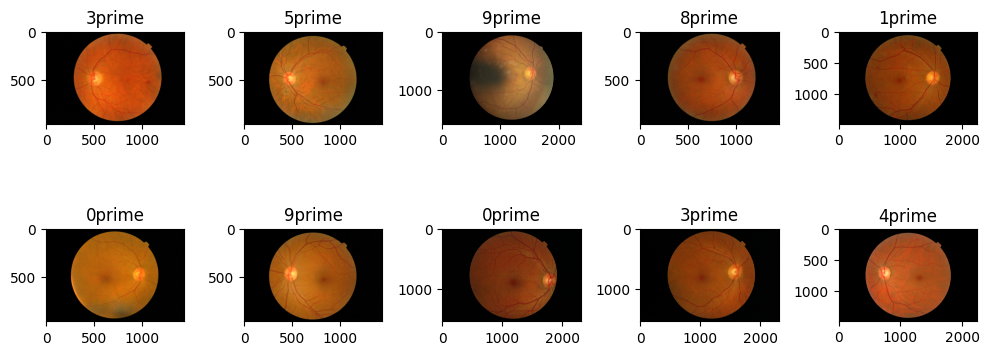

In [10]:
plot_imgs(path_glocoma, 10)

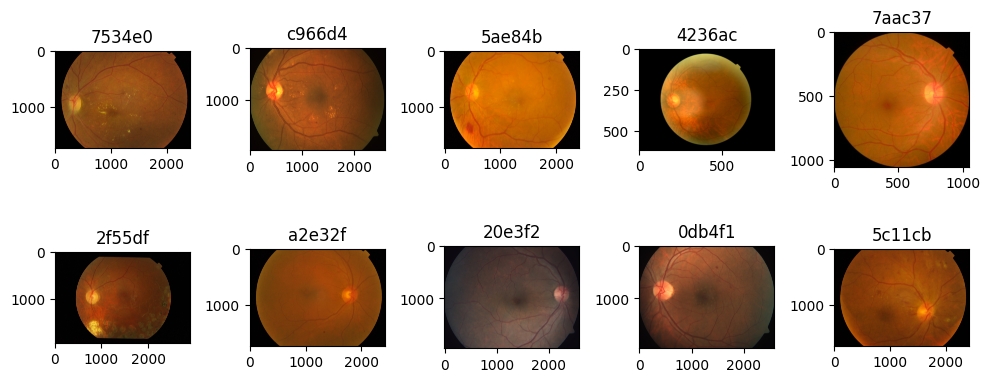

In [11]:
plot_imgs(path_nonglocoma, 10)

In [12]:
splitfolders.ratio(
    "/content/Ratina Dataset/Data",
   output="output",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)

Copying files: 1022 files [00:38, 26.65 files/s]


In [13]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [14]:
train_dataset = train_datagen.flow_from_directory('/content/output/train',
                                                  target_size=(90, 90),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=True
                                                  )

test_dataset = test_datagen.flow_from_directory('/content/output/test',
                                                target_size=(90, 90),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=64,
                                                shuffle=True
                                                )

valid_dataset = valid_datagen.flow_from_directory('/content/output/val',
                                                  target_size=(90, 90),
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  color_mode='grayscale',
                                                  shuffle=True
                                                  )

Found 816 images belonging to 2 classes.
Found 104 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


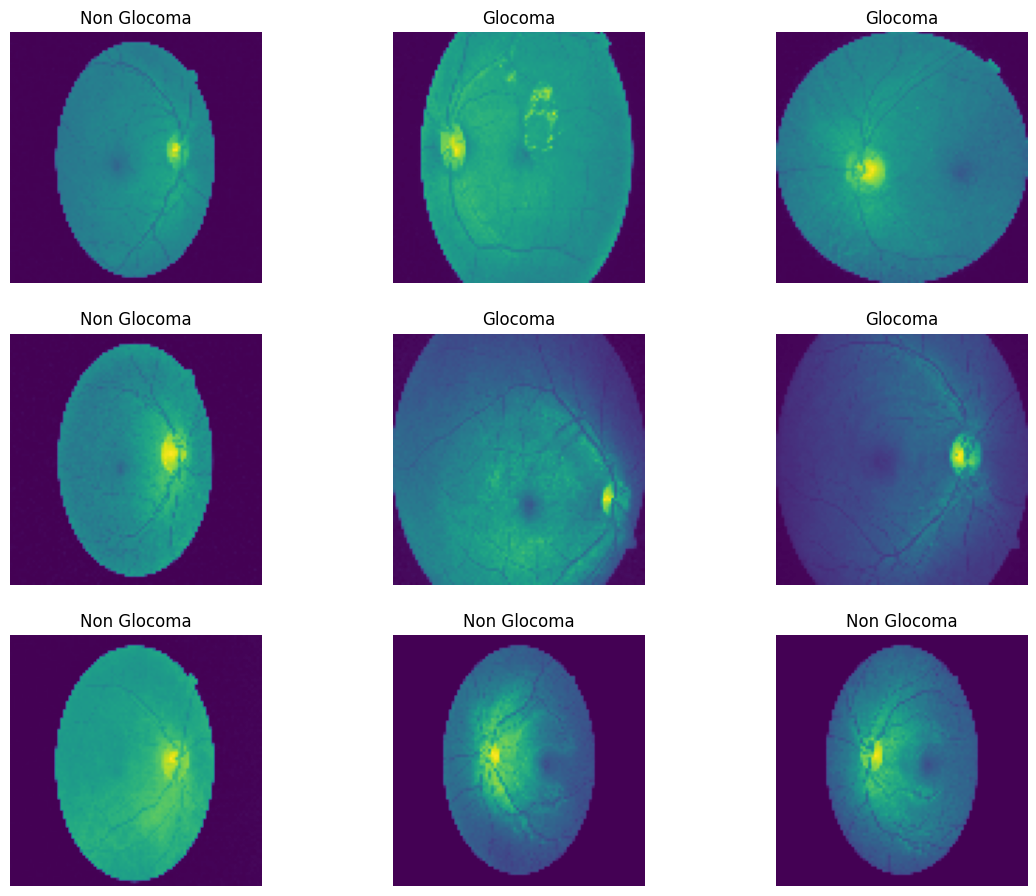

In [15]:
class_names = ['Non Glocoma', 'Glocoma']

def class_type(dataset, n_images):

    i = 1
    images, labels = dataset.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))

    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[np.argmax(label)])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

class_type(train_dataset, 10)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(90, 90, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 44, 44, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 44, 44, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        1

In [17]:
history = model.fit(
    train_dataset,

    epochs=15,

    validation_data=valid_dataset,

)

Epoch 1/15
13/13 [==============================] - 105s 8s/step - loss: 0.4037 - accuracy: 0.8382 - val_loss: 0.3606 - val_accuracy: 0.9412
Epoch 2/15
13/13 [==============================] - 89s 7s/step - loss: 0.1892 - accuracy: 0.9375 - val_loss: 0.1500 - val_accuracy: 0.9706
Epoch 3/15
13/13 [==============================] - 85s 7s/step - loss: 0.0726 - accuracy: 0.9767 - val_loss: 0.0735 - val_accuracy: 0.9804
Epoch 4/15
13/13 [==============================] - 103s 8s/step - loss: 0.0303 - accuracy: 0.9951 - val_loss: 0.0425 - val_accuracy: 0.9804
Epoch 5/15
13/13 [==============================] - 83s 6s/step - loss: 0.0095 - accuracy: 0.9988 - val_loss: 0.0252 - val_accuracy: 0.9804
Epoch 6/15
13/13 [==============================] - 83s 7s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 7/15
13/13 [==============================] - 83s 6s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9902
Epoch 8/15
13/13 [

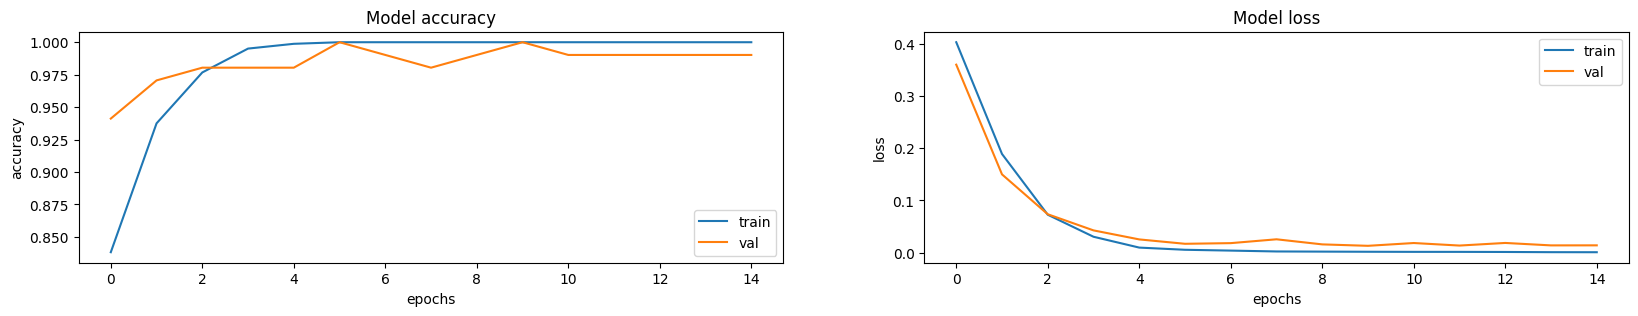

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [19]:
predictions = model.predict(test_dataset)

2/2 [==============================] - 10s 5s/step


2/2 [==============================] - 0s 94ms/step


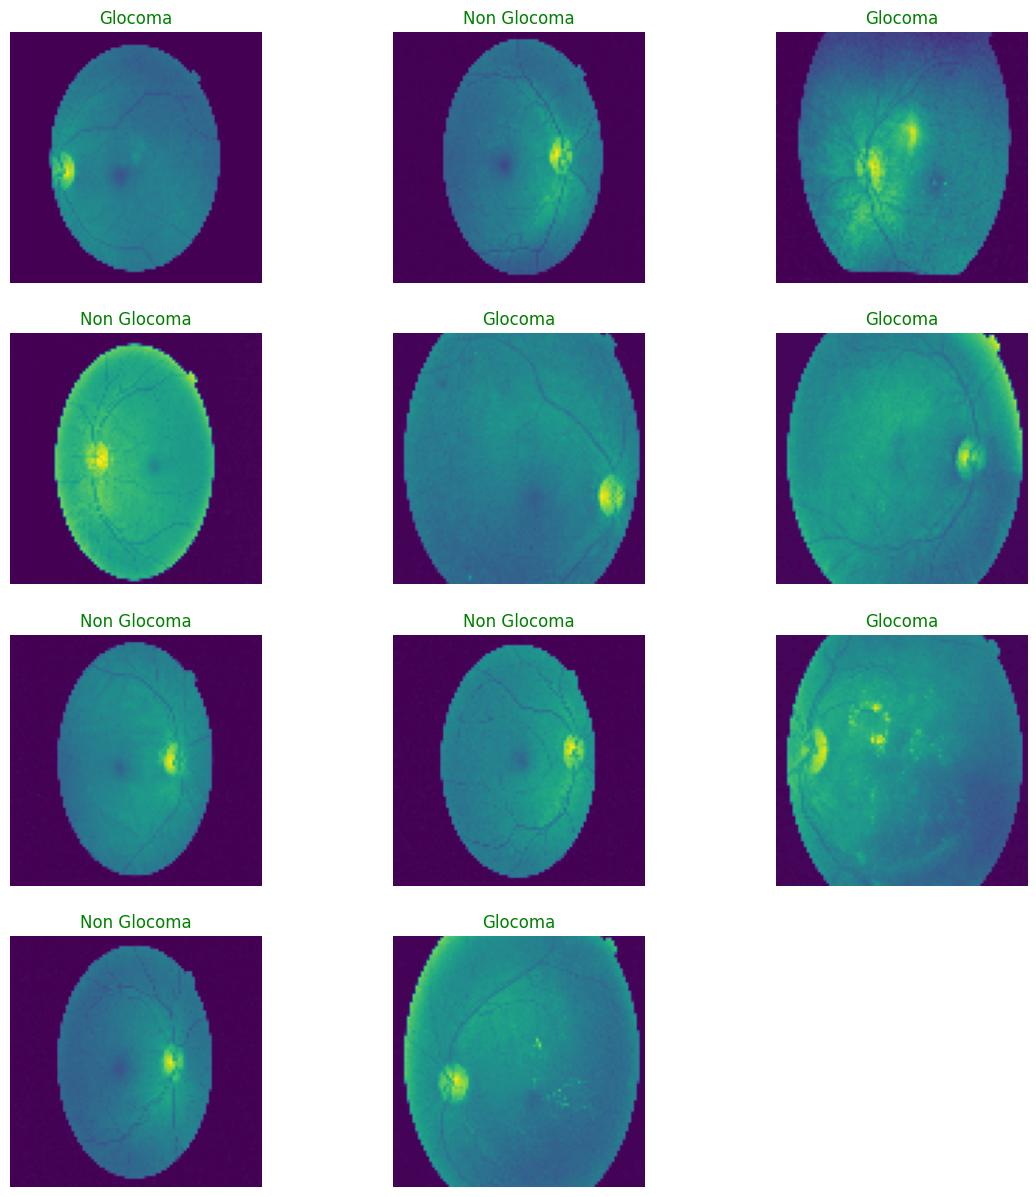

In [22]:
def class_prediction(dataset, n_images):
    i = 1
    images, labels = dataset.next()

    predictions = model.predict(images)
    pred = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis= 1)
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if pred[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

class_prediction(test_dataset, 12)

In [23]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [24]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

In [26]:
model.evaluate(test_dataset)

2/2 [==============================] - 12s 7s/step - loss: 0.0358 - accuracy: 0.9904


[0.035778045654296875, 0.9903846383094788]

In [27]:
y_pred = np.argmax(predictions, axis = 1)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [28]:
y_true = test_dataset.classes

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[25, 27],
       [28, 24]])

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        52
           1       0.47      0.46      0.47        52

    accuracy                           0.47       104
   macro avg       0.47      0.47      0.47       104
weighted avg       0.47      0.47      0.47       104

